In [442]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [460]:
#Reading the Subset CSV file
sample = pd.read_csv("Sample records.csv")
sample.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year
0,1,SOODJVB12A58A7B187,651020,P.E.A.C.E / War,ARYZFGE1187FB39A8C,NaN,NaN,NaN,False Prophets,0.0,242.88608,0,0.600,119.048,4,0.195,Banana Split Republic,1984
1,2,SOHWDNK12A6D4F9837,47240,MTV Unplugged,ARMI8BW1187FB57B2E,NaN,New York NY,NaN,Kiss,0.0,283.84608,8,0.936,149.012,4,0.000,Every Time I Look At You,0
2,3,SONTOZF12A8C138296,295707,Voy A Enamorarte,AR4O3MM1187FB3DF77,18.22328,Puerto Rico,-66.42889,Gisselle,0.0,244.34893,10,0.272,78.571,4,0.516,Prefiero Decir Adios,0
3,4,SODDUCR12A58A7756F,13393,Marshall Crenshaw,AR2MD2P1187FB5B328,NaN,Detroit,NaN,Marshall Crenshaw,0.0,95.86893,8,0.853,162.653,4,1.000,Rave On (Live 1982),2000
4,5,SOIIKIF12A8C131B3F,284966,Rabbit Songs,ARC6UC81187B989062,40.71455,NY - New York City,-74.00712,Hem,0.0,222.74567,4,0.500,108.054,3,1.000,When I Was Drinking,2000


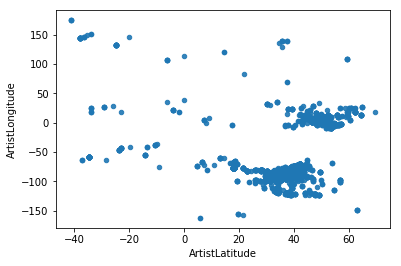

In [475]:
#Question 1: Where do most of the artists come from?

#Selecting appropriate attributes for answering this question 
location = sample[['SongID','ArtistID', 'ArtistLatitude', 'ArtistLongitude','ArtistLocation']]
#location.head()

#Removing Null
location_nonull = location[np.isfinite(location['ArtistLatitude'])]
#location_nonull.head()
#location_nonull["Coordinates"] = location_nonull["ArtistLatitude"].map(str) + location_nonull["ArtistLongitude"]


#Plotting a scatter plot
location_nonull.plot(kind="scatter", x="ArtistLatitude", y="ArtistLongitude", alpha=0.9)
plt.show()

In [463]:
#Question2: 2. What years had the highest number of album/song releases? 
#Displayed Counts as per descending order of years, the songs were released

#sample.head()

Years = sample[['SongID','ArtistID','ArtistName','Title', 'Year']]
Years.head()

,SongID,ArtistID,ArtistName,Title,Year
0,SOODJVB12A58A7B187,ARYZFGE1187FB39A8C,False Prophets,Banana Split Republic,1984
1,SOHWDNK12A6D4F9837,ARMI8BW1187FB57B2E,Kiss,Every Time I Look At You,0
2,SONTOZF12A8C138296,AR4O3MM1187FB3DF77,Gisselle,Prefiero Decir Adios,0
3,SODDUCR12A58A7756F,AR2MD2P1187FB5B328,Marshall Crenshaw,Rave On (Live 1982),2000
4,SOIIKIF12A8C131B3F,ARC6UC81187B989062,Hem,When I Was Drinking,2000


In [503]:
Years = Years[(Years.Year != 0)]
a = Years.groupby(['Year']).size().reset_index(name = 'Count')
b = a.sort_values('Year', ascending=True)
a.sort_values('Count', ascending=False).head(5)

,Year,Count
63,2006,320
62,2005,304
64,2007,285
61,2004,270
60,2003,254


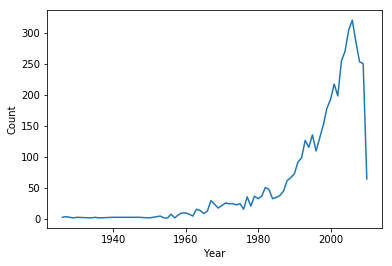

In [504]:
from pylab import *
plot(b.Year, b.Count)
xlabel('Year')
ylabel ('Count')
show()
#plt.plot(x= b.Year, y = b.Count, 'ro')

#plt.show

[  8.30000000e+02   3.06700000e+03   4.14000000e+02   7.20000000e+01
   1.80000000e+01   4.00000000e+00   2.00000000e+00   1.00000000e+00
   1.00000000e+00   3.00000000e+00] [  0.05920333   2.86453667   5.66987      8.47520333  11.28053667  14.08587
  16.89120333  19.69653667  22.50187     25.30720333  28.11253667] <a list of 10 Patch objects>


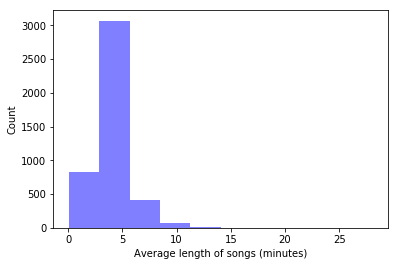

In [474]:
#Question3: 
sample.head()

#Selecting appropriate Attributes
Time = sample[['SongID','ArtistName', 'Title','Duration']]
#Time.head(5)

#Removing Null Nalues
Time_nonull= Time[Time.Duration != 0]
#ArtistName_nonull = Time[Time.ArtistName != 0]


Time_nonull['Count'] = Time_nonull.groupby('ArtistName')['ArtistName'].transform('count')
#Years_nonull.head()
Time_selected = Time_nonull[['ArtistName','Duration']] 
#Time_selected

#Getting Mean Duration
mean_duration = Time_selected.groupby('ArtistName')['Duration'].mean().reset_index()
mean_duration
c= mean_duration.sort_values(by = 'Duration', ascending=False)

#Converting seconds to minutes
c['minutes'] = c.Duration/60
#c.head(10)


#Plotting the Histogram
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
num_bins = 10
n, bins, patches = plt.hist(c.minutes, num_bins, facecolor='blue', alpha=0.5)
print(n, bins, patches)
plt.xlabel("Average length of songs (minutes)")
plt.ylabel('Count')
plt.show()